In [5]:
%pylab inline
import os, sys

sys.path.append("../..")
import numpy as np
import h5py
from tqdm import tqdm

from astroclip.env import format_with_env
from plotting import plot_similar_images, plot_similar_spectra

ASTROCLIP_ROOT = format_with_env("{ASTROCLIP_ROOT}")

# Load the embeddings
embedding_loc = f"{ASTROCLIP_ROOT}/datasets/embeded_astroclip.hdf5"
with h5py.File(embedding_loc, "r") as f:
    images = f["image"][:]
    spectra = f["spectrum"][:]
    im_embeddings = f["image_embeddings"][:]
    sp_embeddings = f["spectrum_embeddings"][:]
    obj_ids = f["object_id"][:]

# Normalize the embeddings
image_features_normed = im_embeddings / np.linalg.norm(
    im_embeddings, axis=-1, keepdims=True
)
spectrum_features_normed = sp_embeddings / np.linalg.norm(
    sp_embeddings, axis=-1, keepdims=True
)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


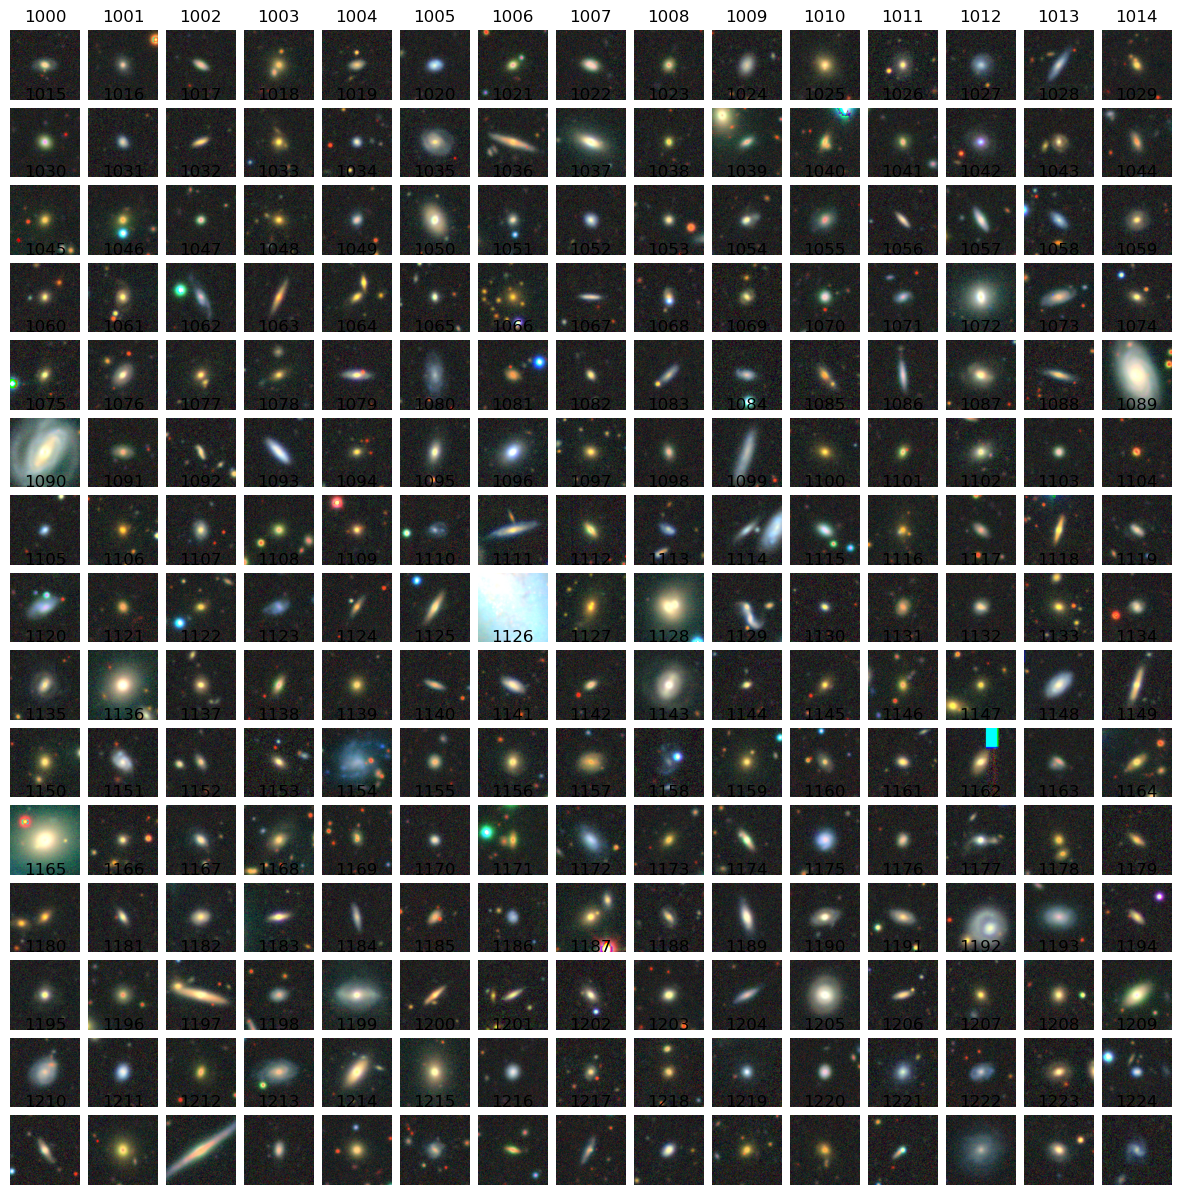

In [37]:
# Look at some randomly selected galaxies
figure(figsize=[15, 15])
for i in range(15):
    for j in range(15):
        subplot(15, 15, i * 15 + j + 1)
        imshow(images[i * 15 + j + 1000].T)
        title(i * 15 + j+ 1000)
        axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.11)

# Plot retrieved galaxy images

In [43]:
# Choose some galaxies to search for similar galaxies
ind_query = [7, 354, 526, 300]

# Find the indices of the galaxies in the dataset
im_sims = []

for ind in ind_query:
    # Compute the similarity between the query galaxy and all other galaxies
    sp_sim = spectrum_features_normed[ind] @ spectrum_features_normed.T
    im_sim = image_features_normed[ind] @ image_features_normed.T
    x_im_sim = image_features_normed[ind] @ spectrum_features_normed.T
    x_sp_sim = spectrum_features_normed[ind] @ image_features_normed.T

    # Find the 8 most similar galaxies (images)
    im_sims.append(
        {
            "sp_sim": [images[i] for i in argsort(sp_sim)[::-1][:8]],
            "im_sim": [images[i] for i in argsort(im_sim)[::-1][:8]],
            "x_im_sim": [images[i] for i in argsort(x_im_sim)[::-1][:8]],
            "x_sp_sim": [images[i] for i in argsort(x_sp_sim)[::-1][:8]],
        }
    )

/tmp/ipykernel_3872307/2141968451.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(query_images), 13, n * 13 + j + 1 + 1)


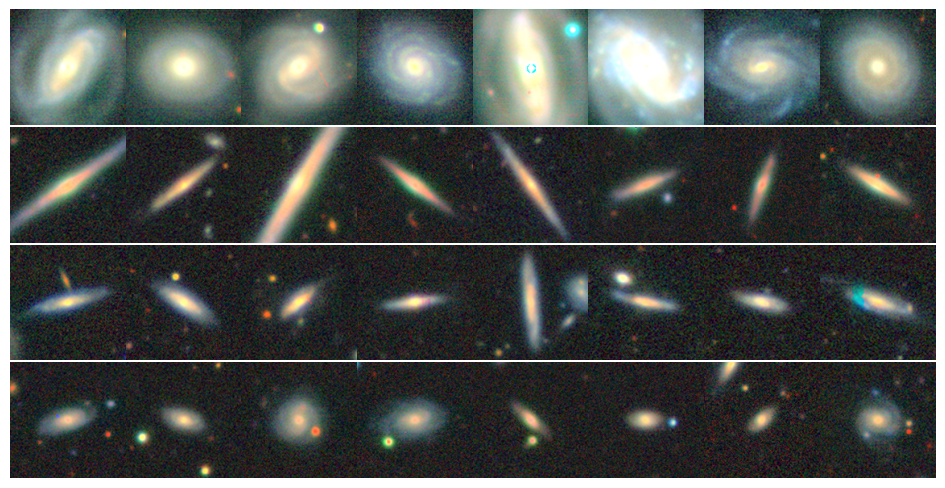

In [39]:
# Image-image similarity
plot_similar_images(
    [images[i] for i in ind_query],
    im_sims,
    similarity_type="im_sim",
    num_retrievals=8,
    save_dir="../outputs/image_retrieval/",
)

/tmp/ipykernel_3872307/2141968451.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(query_images), 13, n * 13 + j + 1 + 1)


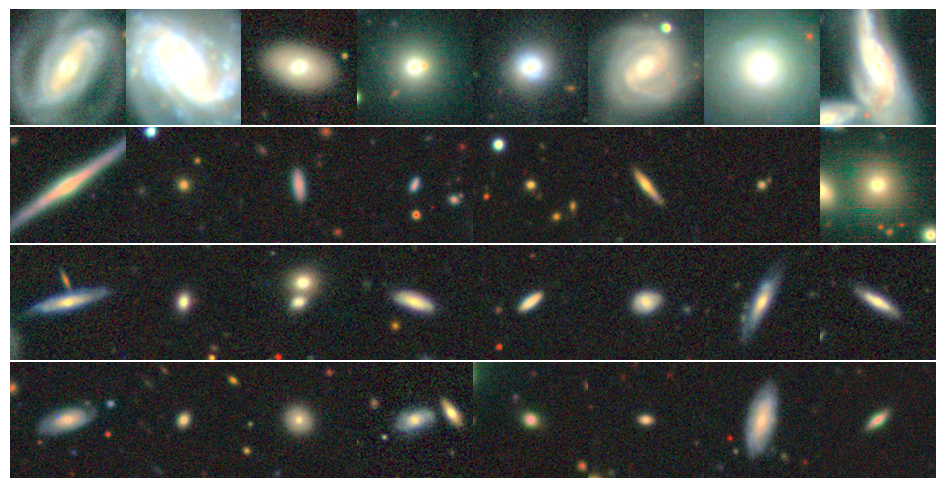

In [40]:
# Spectrum-spectrum similarity
plot_similar_images(
    [images[i] for i in ind_query],
    im_sims,
    similarity_type="sp_sim",
    num_retrievals=8,
    save_dir="../outputs/image_retrieval/",
)

/tmp/ipykernel_3872307/2141968451.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(query_images), 13, n * 13 + j + 1 + 1)


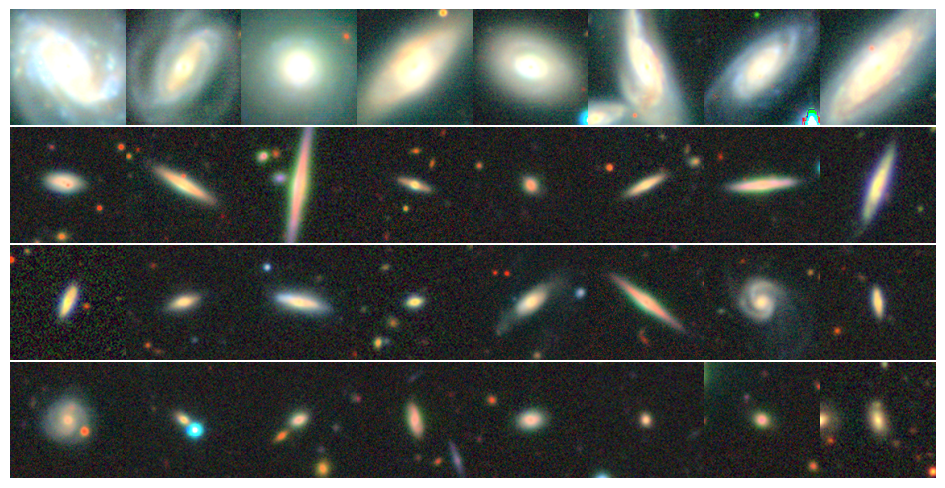

In [41]:
# Image-spectrum similarity
plot_similar_images(
    [images[i] for i in ind_query],
    im_sims,
    similarity_type="x_im_sim",
    num_retrievals=8,
    save_dir="../outputs/image_retrieval/",
)

/tmp/ipykernel_3872307/2141968451.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(query_images), 13, n * 13 + j + 1 + 1)


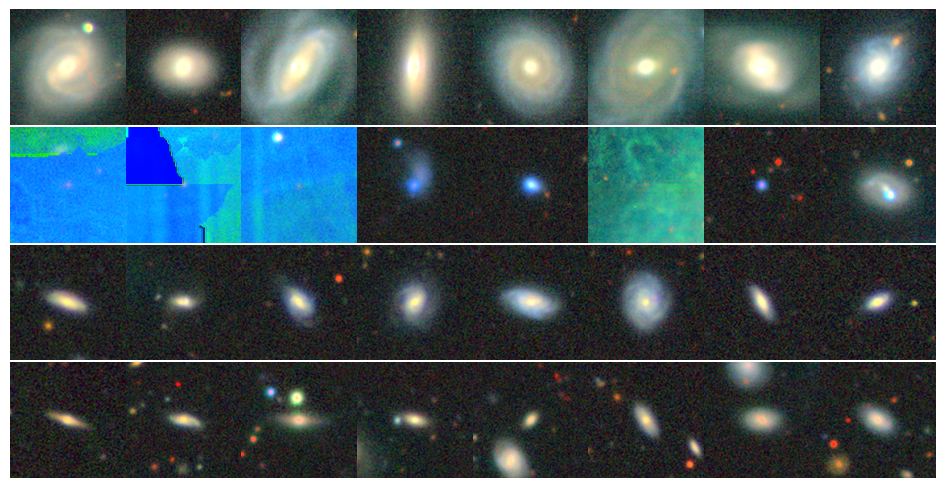

In [42]:
# Spectrum-image similarity
plot_similar_images(
    [images[i] for i in ind_query],
    im_sims,
    similarity_type="x_sp_sim",
    num_retrievals=8,
    save_dir="../outputs/image_retrieval/",
)

# Plot retrieved galaxy spectra

In [ ]:
# Choose some galaxies to search for similar galaxies
ind_query = [7, 77]

# Find the indices of the galaxies in the dataset
sp_sims = []

for ind in ind_query:
    # Compute the similarity between the query galaxy and all other galaxies
    sp_sim = spectrum_features_normed[ind] @ spectrum_features_normed.T
    im_sim = image_features_normed[ind] @ image_features_normed.T
    x_im_sim = image_features_normed[ind] @ spectrum_features_normed.T
    x_sp_sim = spectrum_features_normed[ind] @ image_features_normed.T

    # Find the 8 most similar galaxies (images)
    sp_sims.append(
        {
            "sp_sim": [spectra[i] for i in argsort(sp_sim)[::-1][:8]],
            "im_sim": [spectra[i] for i in argsort(im_sim)[::-1][:8]],
            "x_im_sim": [spectra[i] for i in argsort(x_im_sim)[::-1][:8]],
            "x_sp_sim": [spectra[i] for i in argsort(x_sp_sim)[::-1][:8]],
        }
    )

In [ ]:
# Image-image similarity
plot_similar_spectra(
    [spectra[i] for i in ind_query],
    [images[i] for i in ind_query],
    sp_sims,
    similarity_type="im_sim",
    save_dir="./outputs/spectrum_retrieval/",
)

In [ ]:
# Spectrum-spectrum similarity
plot_similar_spectra(
    [spectra[i] for i in ind_query],
    [images[i] for i in ind_query],
    sp_sims,
    similarity_type="sp_sim",
    save_dir="./outputs/spectrum_retrieval/",
)

In [ ]:
# Image-spectrum similarity
plot_similar_spectra(
    [spectra[i] for i in ind_query],
    [images[i] for i in ind_query],
    sp_sims,
    similarity_type="x_im_sim",
    save_dir="./outputs/spectrum_retrieval/",
)

In [ ]:
# Spectrum-image similarity
plot_similar_spectra(
    [spectra[i] for i in ind_query],
    [images[i] for i in ind_query],
    sp_sims,
    similarity_type="x_sp_sim",
    save_dir="./outputs/spectrum_retrieval/",
)